In [2]:
import pandas as pd
import fastparquet

# Load the two parquet files
data = pd.read_parquet('/Users/maushariff/Downloads/Local_Disk_E/Byrav/Internet2_Data/Data/combined_router_dallas_atla_data.parquet')

# Check the combined data
print(data.head())


   export_sysid                  t_first                   t_last  proto  \
0             6  2021-11-04T00:00:15.104  2021-11-04T00:02:46.400     17   
1            56  2021-11-04T00:04:45.696  2021-11-04T00:04:45.696     17   
2             9  2021-11-04T00:04:14.720  2021-11-04T00:04:14.720      6   
3             4  2021-11-04T00:01:33.952  2021-11-04T00:01:34.720      6   
4             1  2021-11-04T00:02:49.728  2021-11-04T00:02:49.728     17   

       src4_addr      dst4_addr  src_port  dst_port  src_tos  dst_tos  ...  \
0     165.91.8.0   149.137.72.0     45587      8801      184        0  ...   
1  143.215.192.0    198.71.40.0      9097      6151        0        0  ...   
2    52.216.88.0  146.226.136.0       443     53446        0        0  ...   
3  128.118.184.0   139.229.96.0     54262        80        0        0  ...   
4   173.231.80.0   131.94.184.0      8801     12614        0        0  ...   

   src_as  dst_as  src_mask  dst_mask   ip4_next_hop    ip4_router  src6_a

In [3]:
# Display all the field names (columns) in the dataset
field_names = data.columns
print("Field names in the dataset:")
print(field_names)

Field names in the dataset:
Index(['export_sysid', 't_first', 't_last', 'proto', 'src4_addr', 'dst4_addr',
       'src_port', 'dst_port', 'src_tos', 'dst_tos', 'in_packets',
       'input_snmp', 'output_snmp', 'src_as', 'dst_as', 'src_mask', 'dst_mask',
       'ip4_next_hop', 'ip4_router', 'src6_addr', 'dst6_addr', 'ip6_next_hop',
       'router'],
      dtype='object')


In [4]:
# Convert t_first and t_last to datetime without specifying the unit
data['t_first'] = pd.to_datetime(data['t_first'])
data['t_last'] = pd.to_datetime(data['t_last'])

# Find the time range
min_time = data['t_first'].min()
max_time = data['t_last'].max()
print(f"Data range from {min_time} to {max_time}")

Data range from 2021-10-07 14:30:44.992000 to 2021-11-08 23:59:59.232000


In [5]:
# Count the total data for each router
router_counts = data['router'].value_counts()
print("Total data for each router:")
print(router_counts)

Total data for each router:
router
Dallas     125027773
Atlanta     22284871
Name: count, dtype: int64


In [6]:
# Find the maximum packet size
max_packet_size = data['in_packets'].max()
print(f"Maximum packet size: {max_packet_size}")

Maximum packet size: 39850000


In [7]:
# Unique IPv4 addresses (source and destination)
unique_src4_addr = data['src4_addr'].nunique()
unique_dst4_addr = data['dst4_addr'].nunique()

# Unique IPv6 addresses (source and destination)
unique_src6_addr = data['src6_addr'].nunique()
unique_dst6_addr = data['dst6_addr'].nunique()

print(f"Unique IPv4 source addresses: {unique_src4_addr}")
print(f"Unique IPv4 destination addresses: {unique_dst4_addr}")
print(f"Unique IPv6 source addresses: {unique_src6_addr}")
print(f"Unique IPv6 destination addresses: {unique_dst6_addr}")

Unique IPv4 source addresses: 85173
Unique IPv4 destination addresses: 60126
Unique IPv6 source addresses: 21
Unique IPv6 destination addresses: 19


In [8]:
# Statistical summary for key numeric fields
numeric_fields = ['in_packets', 'src_port', 'dst_port', 'src_tos', 'dst_tos']
summary_stats = data[numeric_fields].describe()
print("Statistical summary of numeric fields:")
print(summary_stats)

Statistical summary of numeric fields:
         in_packets      src_port      dst_port       src_tos      dst_tos
count  1.473126e+08  1.473126e+08  1.473126e+08  1.473126e+08  147312644.0
mean   1.556718e+04  3.555087e+04  1.077209e+04  6.661988e+00          0.0
std    1.243047e+05  2.254781e+04  1.941951e+04  2.879924e+01          0.0
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          0.0
25%    5.000000e+03  1.053800e+04  4.430000e+02  0.000000e+00          0.0
50%    5.000000e+03  4.289400e+04  4.430000e+02  0.000000e+00          0.0
75%    5.000000e+03  5.495200e+04  8.801000e+03  0.000000e+00          0.0
max    3.985000e+07  6.553500e+04  6.553500e+04  2.550000e+02          0.0


In [9]:
# Group the data by date to see the distribution over time
data['date'] = data['t_first'].dt.date  # Extract date from t_first
data_distribution = data.groupby('date').size()
print("Data distribution by date:")
print(data_distribution)

Data distribution by date:
date
2021-10-07        2322
2021-10-08    10360621
2021-10-09     7066458
2021-10-10     5973029
2021-10-11    10735768
2021-10-12    11644980
2021-10-13    11575589
2021-10-14    11279675
2021-10-15     9541510
2021-10-16     5484419
2021-10-17     4660953
2021-10-18     4374689
2021-10-19     4553147
2021-10-20     4415581
2021-10-21     4068061
2021-10-22     2750361
2021-10-23     1341213
2021-10-24     1319908
2021-10-25     2784584
2021-10-26     2873106
2021-10-27     2756002
2021-10-28     2698666
2021-10-29     2913245
2021-10-30     1392133
2021-10-31     1416241
2021-11-01     2647625
2021-11-02     2855130
2021-11-03     2909654
2021-11-04     2798288
2021-11-05     2537873
2021-11-06     1417491
2021-11-07     1264878
2021-11-08     2899444
dtype: int64


In [10]:
# Count the frequency of source and destination ports
src_port_counts = data['src_port'].value_counts()
dst_port_counts = data['dst_port'].value_counts()

print("Most common source ports:")
print(src_port_counts.head(10))

print("\nMost common destination ports:")
print(dst_port_counts.head(10))

Most common source ports:
src_port
443      16978294
80        2242196
8444      1958326
8801      1594797
0          899386
1094       302394
53         268234
10400      234096
161        202911
500        190064
Name: count, dtype: int64

Most common destination ports:
dst_port
443     89467491
8801     8206459
4287     2936579
80       2232289
8444     1927328
0         899408
53        768551
3544      715427
3478      698648
8000      682344
Name: count, dtype: int64


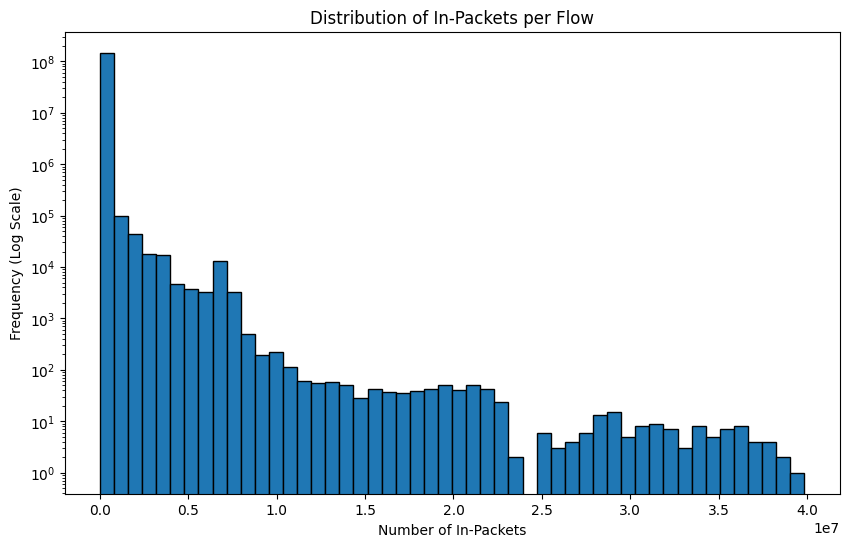

In [11]:
import matplotlib.pyplot as plt

# Plot a histogram for in_packets
plt.figure(figsize=(10, 6))
data['in_packets'].plot(kind='hist', bins=50, edgecolor='black', log=True)
plt.title('Distribution of In-Packets per Flow')
plt.xlabel('Number of In-Packets')
plt.ylabel('Frequency (Log Scale)')
plt.show()

In [12]:
# Get the statistical summary for in_packets
packet_stats = data['in_packets'].describe()
print("Statistical Summary for in_packets:")
print(packet_stats)

Statistical Summary for in_packets:
count    1.473126e+08
mean     1.556718e+04
std      1.243047e+05
min      1.000000e+00
25%      5.000000e+03
50%      5.000000e+03
75%      5.000000e+03
max      3.985000e+07
Name: in_packets, dtype: float64


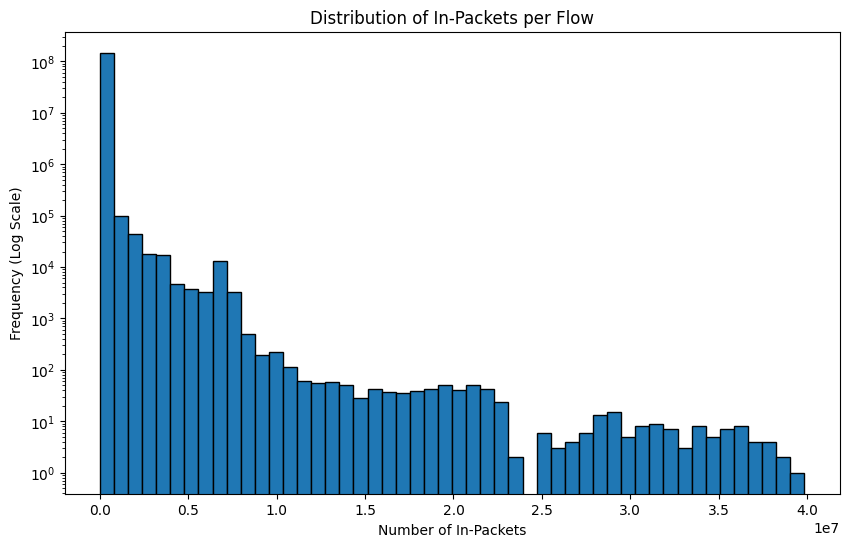

In [13]:
import matplotlib.pyplot as plt

# Plot a histogram for in_packets
plt.figure(figsize=(10, 6))
data['in_packets'].plot(kind='hist', bins=50, edgecolor='black', log=True)
plt.title('Distribution of In-Packets per Flow')
plt.xlabel('Number of In-Packets')
plt.ylabel('Frequency (Log Scale)')
plt.show()

In [14]:
# Convert t_first to datetime format if it's not already
data['t_first'] = pd.to_datetime(data['t_first'], errors='coerce')

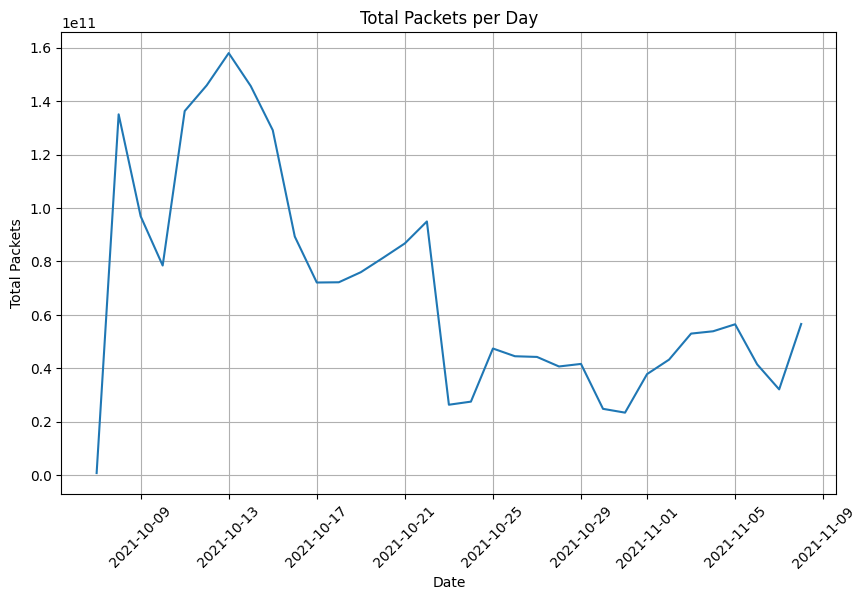

In [15]:
# Group by day to get total packets per day
data['date'] = data['t_first'].dt.date
packets_per_day = data.groupby('date')['in_packets'].sum()

# Plot the daily packet count over time
plt.figure(figsize=(10, 6))
packets_per_day.plot(kind='line')
plt.title('Total Packets per Day')
plt.xlabel('Date')
plt.ylabel('Total Packets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [20]:
# Group by flows (source address, destination address, ports) and sum packets
top_flows = data.groupby(['src4_addr', 'dst4_addr', 'src_port', 'dst_port'])['in_packets'].sum()

# Sort to get the top flows with the most packets
top_flows = top_flows.sort_values(ascending=true).head(10)
print("Top 10 flows by packet count:")
print(top_flows)

Top 10 flows by packet count:
src4_addr      dst4_addr      src_port  dst_port
139.229.128.0  198.51.208.0   0         0           15162105024
203.178.128.0  200.2.0.0      0         0           10919345009
129.114.56.0   147.47.200.0   22        35404        7444975000
198.51.208.0   139.229.128.0  0         0            5796760000
129.0.8.0      136.71.0.0     0         0            4116910000
147.47.200.0   129.114.56.0   35404     22           4050355002
129.114.56.0   147.47.200.0   22        37026        3193900000
                                        52102        2398175000
199.109.80.0   190.103.184.0  0         0            1957615000
131.193.176.0  190.103.184.0  0         0            1843505000
Name: in_packets, dtype: int64


: 

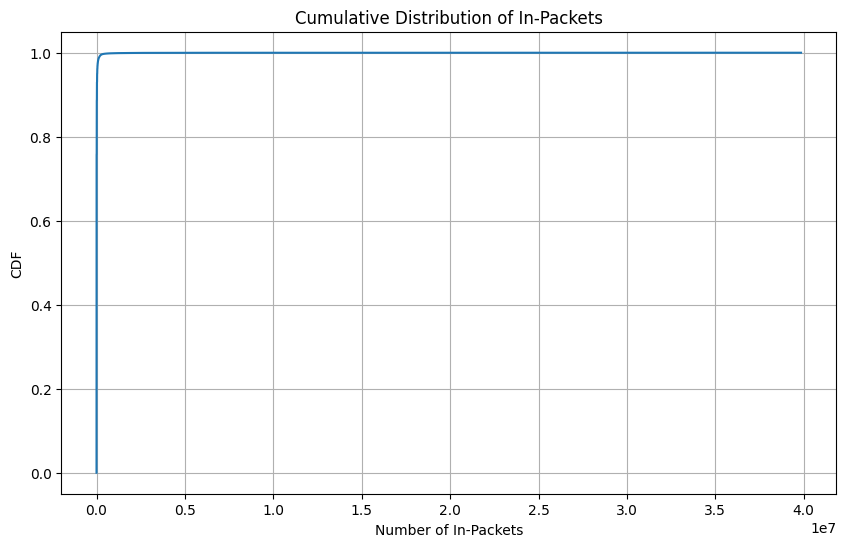

In [17]:
import numpy as np

# Sort packet counts in ascending order
sorted_packets = np.sort(data['in_packets'])

# Calculate the CDF values
cdf = np.arange(len(sorted_packets)) / float(len(sorted_packets))

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_packets, cdf)
plt.title('Cumulative Distribution of In-Packets')
plt.xlabel('Number of In-Packets')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

In [18]:
# Calculate the interquartile range (IQR)
Q1 = data['in_packets'].quantile(0.25)
Q3 = data['in_packets'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 * IQR from the quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data['in_packets'] < lower_bound) | (data['in_packets'] > upper_bound)]

print(f"Number of outlier flows: {len(outliers)}")
print(outliers[['src4_addr', 'dst4_addr', 'src_port', 'dst_port', 'in_packets']].head(10))

Number of outlier flows: 35667527
        src4_addr      dst4_addr  src_port  dst_port  in_packets
0      165.91.8.0   149.137.72.0     45587      8801       10000
3   128.118.184.0   139.229.96.0     54262        80       10000
6   147.124.104.0   131.94.184.0      8801     41961       10000
8     168.5.152.0   173.231.80.0     60324      8801       10000
9    149.137.72.0   131.94.184.0      8801     23859       25000
10  193.239.176.0   136.145.72.0      1095     56136       35000
11    168.5.152.0  147.124.104.0     60378      8801       25000
12  128.186.200.0   147.124.96.0     51914      8801       25000
13   173.231.80.0   131.94.184.0      8801     52078       10000
14    128.227.8.0  198.251.232.0     65484      8801       10000


In [19]:
# Count the total number of flows
total_flows = len(data)

# Calculate the average number of packets per flow
avg_packets_per_flow = data['in_packets'].sum() / total_flows
print(f"Average packets per flow: {avg_packets_per_flow}")

Average packets per flow: 15567.183053594503
